# L11: Introduction to Machine Learning I

**Sources and additional reading:**
- Goodfellow et al., [Deep Learning](https://www.deeplearningbook.org/)
- Bishop, [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- Ng et al., [Lecture notes on machine learning](https://cs229.stanford.edu/main_notes.pdf)
- Dawid et al., [Modern applications of machine learning in quantum sciences](https://arxiv.org/ftp/arxiv/papers/2204/2204.04198.pdf)
- NN image credit: François Lanusse

## Definition: Machine Learning

According to Samuel in 1959 (not fully clear attribute):

Field of study that gives computers the ability to learn without being explicitly programmed.

According to [Mitchell, 1997](http://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf):

A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$.

Taken together this means that in order to make a machine learn we need the following ingredients:
- A task $T$ to learn,
- Experience $E$ which is essentially equivalent to data $D$,
- A performance measure $P$,
- A model $M$ that can be tuned to solve the task $T$.

<font color='pink'>statistics vs. ML</font>

### Setup

Let $\boldsymbol{x}, \boldsymbol{y}$ be two $n$-, respectively $m$-dimensional vectors. 

### The task $T$

Many different types of tasks exist in Machine Learning (ML), but the most common type is to learn the relation between an input variable (or features) $\boldsymbol{x}$ and an output variable $\boldsymbol{y}$, i.e. $\boldsymbol{y}(\boldsymbol{x})$.

Two important examples of of tasks are regression and classification:

**Regression:** The classical situation of regression is that we assume an immediate relation between the input and the output variables, $\boldsymbol{x}, \boldsymbol{y}$. The objective of regression is to find a function $f$ that yields the mapping between $\boldsymbol{x}$ and $\boldsymbol{y}$, i.e. $\boldsymbol{y}=f(\boldsymbol{x})$, for all $\boldsymbol{x}, \boldsymbol{y}$. Practically, optimizing over all input/output pairs and all functions is impossible, and so we resort to a finite data set for which we find the optimal model. An example would be the prediction of house prices given a set of parameters such as location, number of bedrooms, size etc. In a probabilistic interpretation, the algorithm learns the conditional probability distribution $p(\boldsymbol{y}|\boldsymbol{x})$ or some of its properties.

**Classification:** In classification we usually seek to determine to which of $k$ predefined categories a given input $\boldsymbol{x}$ belongs. More specifically, we  try to find a function $f$ that yields a mapping between the input variable and the $k$ categories, i.e. $f: \mathbb{R}^n\to \{1,\cdots,k\}$ such that $\boldsymbol{y}=f(\boldsymbol{x})$. An example would be determining if a picture shows a dog or a cat. In a probabilistic interpretation, the algorithm learns the probability distribution $p(\boldsymbol{x})$ or some of its properties.

### The experience $E$

Experience in ML is gained through analyzing a finite amount of data. To be more precise, data usually comes in the form of a data set $\mathcal{D}$ that contains a finite amount of data instances often called data points $\boldsymbol{x}=(x_1,\cdots,x_n)$. These can come as is, or they can be accompanied by predefined labels or
targets $\boldsymbol{y}=(y_1,\cdots,y_n)$ , i.e. $\mathcal{D} = \{(x_i, y_i )\}$.

Depending on the structure of the data at-hand, we can distinguish two different types of learning algorithms:

**Supervised learning algorithms:** Supervised learning algorithms are ML algorithms that learn from labeled data, i.e. $\mathcal{D} = \{(x_i, y_i )\}$. These encompass both regression and classification tasks described above. 

**Unsupervised learning algorithms:** These types of algorithms usually experience an unlabeled data set, i.e. $\mathcal{D} = \{(x_i)\}$, which could be due to lack of labels, and then learn useful properties of these data. Often the goal is to learn the probability distribution underlying the data $\boldsymbol{x}$ either explicitly or implicitly. Examples for unsupervised learning are clustering, i.e. subdividing the data into clusters with similar properties, or dimensionality reduction.

### The performance measure $P$

In order to evaluate the performance of an ML algorithm for a specific task $T$, we need a quantitative measure, which is the performance measure $P$. We can then use this measure to improve the given model if needed. Usually, performance measures are closely related to the task performed by the ML algorithm.

### The model $M$

Finally, we need a model $M$ that is able to learn to solve a given task. Practically, this is class of functions $f$ (e.g. linear functions) of the input data $\boldsymbol{x}$ whose parameters can be tuned to best fit the data at hand. 

### How do machines learn?

Given all of this, machines learn performing a task $T$ by optimizing the parameters of the model $M$ to minimize/maximize the performance measure $P$ for a given data set $D$ available to the algorithm.

## Machine learning models

### Neural Networks: The supervised version

### Example

In our example, we will consider a data set, $\boldsymbol{x}$, of the house prices in Portland, OR. The data gives the area in square feet, the number of bedrooms and the corresponding price of the house. We expect a linear relation between the house price and the size, and so we can use least squares to find the optimal relation, parametrized by $$f(\boldsymbol{x})=\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b},$$ where we call $\boldsymbol{w}$ the weights and $\boldsymbol{b}$ the biases of our model.

In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [122]:
data = np.genfromtxt('data/houses_Portland.txt', delimiter=',')

In [138]:
lsq_params = np.linalg.lstsq(np.vstack((data[:, 0], np.ones_like(data[:, 0]))).T, data[:, 2]*1e-3, rcond = None)[0]

Text(0, 0.5, 'price $[k\\$]$')

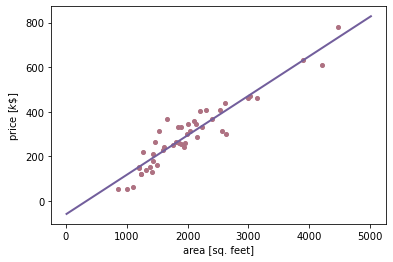

In [145]:
area = np.logspace(1, 3.7, 100)
model = lsq_params[0]*area+lsq_params[1]

plt.scatter(data[:, 0], data[:, 2]*1e-3, marker='.', color='#AE7182', s=65)
plt.plot(area, model, linewidth=2, color='#725e9c')
plt.xlabel('area [sq. feet]')
plt.ylabel(r'price $[k\$]$')

Now we observe that our model is not ideal as it admits negative house prices for small sizes. We would like to remedy this shortcoming by defining a new model such that $$f(\boldsymbol{x})=\max\{\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b},0\}.$$ This produces a kink in the predictions and is not a linear model of the data anymore.

Text(0, 0.5, 'price $[k\\$]$')

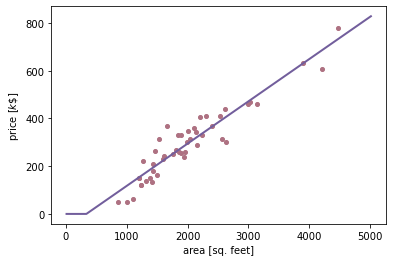

In [147]:
model[model<=0] = 0

plt.scatter(data[:, 0], data[:, 2]*1e-3, marker='.', color='#AE7182', s=65)
plt.plot(area, model, linewidth=2, color='#725e9c')
plt.xlabel('area [sq. feet]')
plt.ylabel(r'price $[k\$]$')

We have just created a neural network that consists of a simgle neuron. It is the combination of a linear function $\boldsymbol{z}=\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b}$, and a nonlinear, so-called activation function $h(z)=\max\{0, z\}$, i.e. $f(\boldsymbol{x})=h(\boldsymbol{z}(\boldsymbol{x}))$. In ML, the function $h(z)=\max\{0, z\}$ is called a rectified linear unit or ReLU.

### Feedforward Neural Networks

A feedforward Neural Network (NN) is a method to approximate a given function $f^*(\boldsymbol{x})$. A feedforward NN defines a mapping $\boldsymbol{y}=f(\boldsymbol{x}, \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ denotes the parameters of the model that the NN is optimized over. These types of models are called *feedforward* because information flows from $\boldsymbol{x}$ through the function $f$ (and the associated intervening steps) and finally to $\boldsymbol{y}$, but there is no possibility for outputs of the model to be fed back into the network. 

Feedforward NNs are called networks because they are typically constructed by concatenating a large number of relatively simple functions. The model can be reprensented by an acyclic graph (no loops) that illustrates how to combine all subfunctions together. If we denote the subfunctions as $f_i, i=1,\cdots, n$, then we can write the network as $f(\boldsymbol{x})=f_n(\cdots f_2(f_1(\boldsymbol{x}))))$. The function $f_1$ is called the first *layer* of the NN, $f_2$ is the second etc. The final layer is also called the *output layer*.

The input and output layers directly interact with the data $\boldsymbol{x}, \boldsymbol{y}$. In the input layer, the activations of the neurons are set to the input to the network, i.e. $\boldsymbol{x}$, while the activations of the last layer constitute the network's output. The behavior of all other layers is not directly specified by the training data and they are thus called hidden layers. 

Each layer typically consists of multiple nodes or units, which are also called *artificial neuron* or *perceptron*. NNs in which each node in a given layer is connected to all nodes in the next layer are called *fully-connected*. The specific number and combination of layers and neurons is called the *architecture* of the NN.

The figure below shows an illustration of a fully-connected feedforward NN with two hidden layers. 

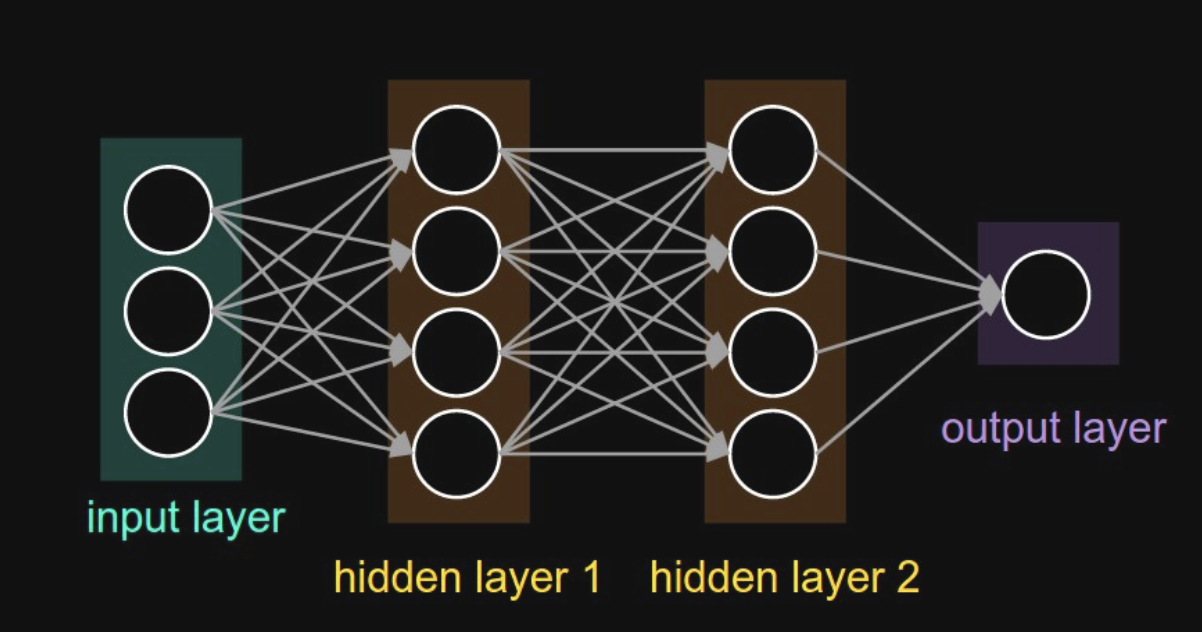

### Neurons as building blocks of NNs

As we have seen, the building blocks of NNs are the neurons. So what are these exactly?

Let $i$ denote a generic neuron in a NN layer consisting of $m$ units. Each neuron is specified by a set of weights $w_{ij}, i=1,\cdots, n, \; j=1,\cdots,m$ and biases $b_i$. Given an input vector $\boldsymbol{x} = (x_1,\cdots, x_n)$, it first computes a scalar linear combination as $$z_j=\sum_i w_{ji}x_i+b_j.$$ In a second step, it applies a nonlinear activation function $\sigma$ to produce its final output, also called activation as $$a_j = \sigma(z_j)=\sigma\left(\sum_i w_{ji}x_i+b_j\right).$$ The activation (i.e. the output of a neuron) is a scalar. The weights of a neuron control the strength of its connection to the neurons of the previous layer. 

There exist a number of popular activation functions used in NN, the most common ones being the ReLU activation function, the sigmoid and the tanh. These are illustrated below.

In [1]:
def sigmoid(x):
    '''Sigmoid activation function.'''

    return 1/(1+np.exp(-x))

def tanh(x):
    '''Tanh activation function.'''

    return np.tanh(x)

def ReLU(x):
    '''ReLU activation function. '''
    
    xtemp = copy.deepcopy(x)
    xtemp[x<=0]=0

    return xtemp

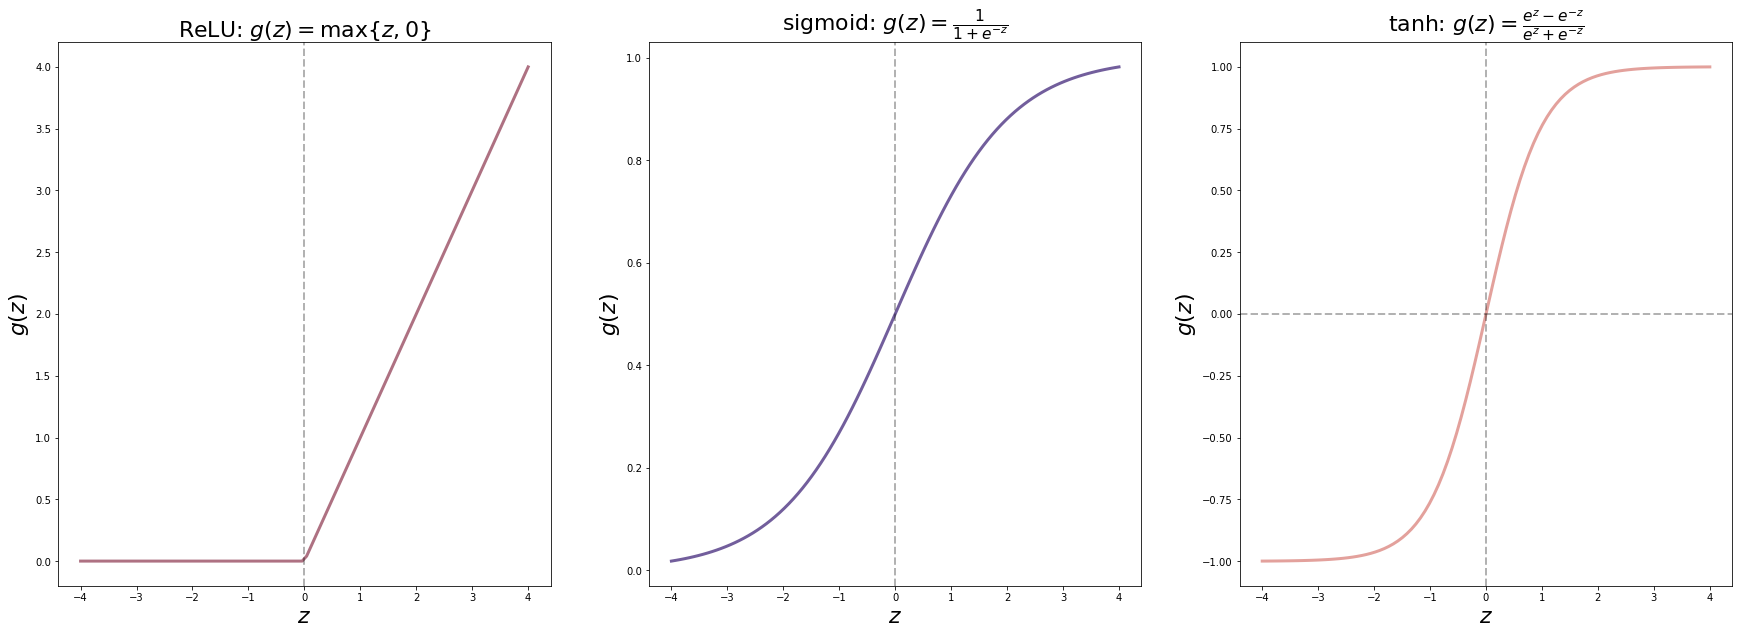

In [24]:
x = np.linspace(-4, 4, 100)

fig = plt.figure(figsize=(30, 10))
gs = GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.plot(x, ReLU(x), linewidth=3, color='#AE7182')
ax1.set_xlabel(r'$z$', size=22)
ax1.set_ylabel(r'$g(z)$', size=22)
ax1.set_title(r'ReLU: $g(z)=\max\{z, 0\}$', size=22)
ax1.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax2.plot(x, sigmoid(x), linewidth=3, color='#725e9c')
ax2.set_title(r'sigmoid: $g(z)=\frac{1}{1+e^{-z}}$', size=22)
ax2.set_xlabel(r'$z$', size=22)
ax2.set_ylabel(r'$g(z)$', size=22)
ax2.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax3.plot(x, tanh(x), linewidth=3, color='#e3a19c')
ax3.set_title(r'tanh: $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$', size=22)
ax3.set_xlabel(r'$z$', size=22)
ax3.set_ylabel(r'$g(z)$', size=22)
ax3.axhline(y=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax3.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)